# Problem Statement:

Now a days people usually search for the best rated anime based on the genre and their interests.

Some people are interested in latest released  Action anime too.

So, we decided to do the analysis on anime based on Action sector and also used the website “My anime list”  which releases the accurate and genuine reviews.




In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [2]:
df=pd.read_csv("C:\\Users\\Admin\\Anime.csv")

In [3]:
df

,Unnamed: 0,Title,Users,Rating,Released,Source,Studio,Demographic
0,0,Shingeki no Kyojin,3.6M,8.53,"TV, 2013",['Manga'],['Wit Studio'],['Shounen']
1,1,Fullmetal Alchemist: Brotherhood,3.1M,9.11,"TV, 2009",['Manga'],['Bones'],['Shounen']
2,2,One Punch Man,3.0M,8.50,"TV, 2015",['Web manga'],['Madhouse'],['Seinen']
3,3,Sword Art Online,2.9M,7.20,"TV, 2012",['Light novel'],['A-1 Pictures'],[]
4,4,Boku no Hero Academia,2.8M,7.91,"TV, 2016",['Manga'],['Bones'],['Shounen']
...,...,...,...,...,...,...,...,...
630,630,Assault Lily: Bouquet,80K,6.47,"TV, 2020",['Mixed media'],['Shaft'],[]
631,631,Persona: Trinity Soul,80K,6.52,"TV, 2008",['Original'],['A-1 Pictures'],[]
632,632,Touken Ranbu: Hanamaru,80K,6.83,"TV, 2016",['Game'],['Doga Kobo'],[]
633,633,Trigun Stampede,80K,7.35,"TV, 2023",['Manga'],['Orange'],['Shounen']


# Data cleaning(removing"[]" and ')

In [4]:
df["Source"] =df["Source"].str.replace("[","").str.replace("]","").str.replace("'","")
df["Studio"] =df["Studio"].str.replace("[","").str.replace("]","").str.replace("'","")
df["Demographic"] =df["Demographic"].str.replace("[","").str.replace("]","").str.replace("'","")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6288\3758050641.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Source"] =df["Source"].str.replace("[","").str.replace("]","").str.replace("'","")
C:\Users\Admin\AppData\Local\Temp\ipykernel_6288\3758050641.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Studio"] =df["Studio"].str.replace("[","").str.replace("]","").str.replace("'","")
C:\Users\Admin\AppData\Local\Temp\ipykernel_6288\3758050641.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Demographic"

In [5]:
df.head()

,Unnamed: 0,Title,Users,Rating,Released,Source,Studio,Demographic
0,0,Shingeki no Kyojin,3.6M,8.53,"TV, 2013",Manga,Wit Studio,Shounen
1,1,Fullmetal Alchemist: Brotherhood,3.1M,9.11,"TV, 2009",Manga,Bones,Shounen
2,2,One Punch Man,3.0M,8.50,"TV, 2015",Web manga,Madhouse,Seinen
3,3,Sword Art Online,2.9M,7.20,"TV, 2012",Light novel,A-1 Pictures,
4,4,Boku no Hero Academia,2.8M,7.91,"TV, 2016",Manga,Bones,Shounen


# checking null values

In [6]:
df['Users'].isnull().value_counts()

False    635
Name: Users, dtype: int64

In [7]:
df['Title'].isnull().value_counts()

False    635
Name: Title, dtype: int64

In [8]:
df['Rating'].isnull().value_counts()

False    626
True       9
Name: Rating, dtype: int64

In [9]:
df['Released'].isnull().value_counts()

False    635
Name: Released, dtype: int64

In [10]:
df['Studio'].isnull().value_counts()

False    635
Name: Studio, dtype: int64

In [11]:
df['Source'].isnull().value_counts()

False    635
Name: Source, dtype: int64

# checking unique values

In [12]:
df['Source'].unique()

array(['Manga', 'Web manga', 'Light novel', 'Original', 'Visual novel',
       'Game', 'Mixed media', 'Novel', 'Card game', 'Other'], dtype=object)

In [13]:
df.Rating.unique()

array([8.53, 9.11, 8.5 , 7.2 , 7.91, 8.52, 7.98, 7.79, 9.04, 8.13, 8.25,
       8.66, 8.62, 8.7 , 8.68, 7.96, 8.06, 9.06, 7.47, 7.68, 7.43, 8.49,
       6.7 , 8.09, 7.5 , 7.9 , 8.81, 8.34, 8.75, 7.03, 8.91, 7.58, 8.04,
       7.92, 7.49, 7.84, 7.22, 8.63, 8.14, 7.99, 7.55, 7.08, 8.28, 8.12,
       8.16, 8.11, 8.73, 7.82, 7.71, 7.16, 7.42, 8.51, 8.82, 7.67, 8.1 ,
       8.24, 7.73, 8.67, 6.38, 7.93, 7.6 , 8.56, 8.77, 7.4 , 8.44, 8.19,
       8.94, 8.02, 7.56, 7.76, 8.03, 7.66, 8.58, 7.28, 8.07, 7.45, 7.1 ,
       7.48, 8.37, 7.97, 8.39, 7.07, 7.3 , 5.72, 8.32, 8.22, 6.42, 7.24,
       7.36, 8.2 , 7.26, 7.69, 7.23, 7.86, 7.62, 7.44, 7.38, 7.65, 7.8 ,
       6.99, 7.14, 6.45, 7.83, 6.56, 7.74, 6.72, 8.27, 8.45, 6.83, 6.69,
       7.05, 6.64, 7.35, 6.47, 7.37, 8.55, 7.  , 9.07, 8.38, 7.46, 8.41,
       7.41, 7.15, 6.61, 6.44, 7.21, 7.72, 6.86, 6.75, 8.18, 7.61, 8.42,
       8.29, 7.25, 7.57, 7.85, 7.18, 7.54, 7.33, 7.06, 8.4 , 7.01, 8.71,
       7.63, 6.58, 7.77, 8.43, 6.54, 6.82, 6.8 , 6.

In [14]:
df["Studio"].unique()

array(['Wit Studio', 'Bones', 'Madhouse', 'A-1 Pictures', 'ufotable',
       'Pierrot', 'MAPPA', 'Sunrise', 'Toei Animation', 'White Fox',
       'asread.', 'Lerche', 'sGainaxTatsunoko Production',
       'sA-1 PicturesSatelight', 'Trigger', 'J.C.Staff', 'Production I.G',
       'sA-1 PicturesCloverWorksTrigger', 'David Production', 'Gainax',
       'Kinema Citrus', 'Arms', '"Brains Base"', '8bit',
       'sCloverWorksWit Studio', 'Manglobe', 'sMAPPATezuka Productions',
       'Kyoto Animation', 'LIDENFILMS', 'sPierrotPierrot Plus',
       'Satelight', 'sA-1 PicturesBridge', 'Studio Deen',
       'sNexusSILVER LINK.', 'sKinema CitrusOrange', 'TNK',
       'Telecom Animation Film', 'Nut', 'Seven Arcs Pictures', 'GoHands',
       'SILVER LINK.', 'Gonzo', 'Shuka', 'sDR MovieKinema Citrus',
       'TMS Entertainment', 'Production IMS', 'sasread.White Fox',
       'Tatsunoko Production', 'sConnectSILVER LINK.', 'Passione', 'OLM',
       'Studio 3Hz', 'Bandai Namco Pictures', 'Pierrot Plus',

In [15]:
df['Released'].unique()

array(['TV, 2013', 'TV, 2009', 'TV, 2015', 'TV, 2012', 'TV, 2016',
       'TV, 2019', 'TV, 2002', 'TV, 2014', 'TV, 2011', 'TV, 2017',
       'TV, 2007', 'TV, 2020', 'TV, 2018', 'TV, 2006', 'TV, 1999',
       'TV, 2004', 'TV, 1998', 'TV, 1995', 'TV, 2008', 'TV, 2010',
       'TV, 2003', 'TV, 2022', 'TV, 1989', 'TV, 2021', 'TV, 2000',
       'TV, 2001', 'TV, 1992', 'TV, 1996', 'TV, 1997', 'TV, 2005',
       'TV, 2023', 'TV, -', 'TV, 1984', 'TV, 1979', 'TV, 1982',
       'TV, 1971', 'TV, 1981'], dtype=object)

In [16]:
df['Source']=df['Source'].apply(lambda x : np.NaN if x=="Other" else x)


In [17]:
df['Demographic']=df['Demographic'].apply(lambda x : "not_given" if x=='' else x)


In [18]:
df['Demographic'].unique()

array(['Shounen', 'Seinen', 'not_given', 'Shoujo', 'Kids', 'Josei'],
      dtype=object)

In [19]:
df.head()

,Unnamed: 0,Title,Users,Rating,Released,Source,Studio,Demographic
0,0,Shingeki no Kyojin,3.6M,8.53,"TV, 2013",Manga,Wit Studio,Shounen
1,1,Fullmetal Alchemist: Brotherhood,3.1M,9.11,"TV, 2009",Manga,Bones,Shounen
2,2,One Punch Man,3.0M,8.50,"TV, 2015",Web manga,Madhouse,Seinen
3,3,Sword Art Online,2.9M,7.20,"TV, 2012",Light novel,A-1 Pictures,not_given
4,4,Boku no Hero Academia,2.8M,7.91,"TV, 2016",Manga,Bones,Shounen


In [20]:
df.Released.isnull().value_counts()

False    635
Name: Released, dtype: int64

In [21]:
a="TV, 2013"
a[4:]
a[0:3]

'TV,'

In [22]:
df.Released=df.Released.str.replace('TV,','')

In [23]:
df["Studio"]=df['Studio'].apply(lambda x: x[0].upper() + x[1:].lower() if x[1:]!=x[1:].lower() else x)

In [24]:
df.Studio.unique()

array(['Wit studio', 'Bones', 'Madhouse', 'A-1 pictures', 'ufotable',
       'Pierrot', 'Mappa', 'Sunrise', 'Toei animation', 'White fox',
       'asread.', 'Lerche', 'Sgainaxtatsunoko production',
       'Sa-1 picturessatelight', 'Trigger', 'J.c.staff', 'Production i.g',
       'Sa-1 picturescloverworkstrigger', 'David production', 'Gainax',
       'Kinema citrus', 'Arms', '"brains base"', '8bit',
       'Scloverworkswit studio', 'Manglobe', 'Smappatezuka productions',
       'Kyoto animation', 'Lidenfilms', 'Spierrotpierrot plus',
       'Satelight', 'Sa-1 picturesbridge', 'Studio deen',
       'Snexussilver link.', 'Skinema citrusorange', 'Tnk',
       'Telecom animation film', 'Nut', 'Seven arcs pictures', 'Gohands',
       'Silver link.', 'Gonzo', 'Shuka', 'Sdr moviekinema citrus',
       'Tms entertainment', 'Production ims', 'Sasread.white fox',
       'Tatsunoko production', 'Sconnectsilver link.', 'Passione', 'Olm',
       'Studio 3hz', 'Bandai namco pictures', 'Pierrot plus',

In [25]:
df.Released.unique()

array([' 2013', ' 2009', ' 2015', ' 2012', ' 2016', ' 2019', ' 2002',
       ' 2014', ' 2011', ' 2017', ' 2007', ' 2020', ' 2018', ' 2006',
       ' 1999', ' 2004', ' 1998', ' 1995', ' 2008', ' 2010', ' 2003',
       ' 2022', ' 1989', ' 2021', ' 2000', ' 2001', ' 1992', ' 1996',
       ' 1997', ' 2005', ' 2023', ' -', ' 1984', ' 1979', ' 1982',
       ' 1971', ' 1981'], dtype=object)

In [26]:
df.isnull().sum()

Unnamed: 0      0
Title           0
Users           0
Rating          9
Released        0
Source         10
Studio          0
Demographic     0
dtype: int64

In [27]:
df['Released'].unique()

array([' 2013', ' 2009', ' 2015', ' 2012', ' 2016', ' 2019', ' 2002',
       ' 2014', ' 2011', ' 2017', ' 2007', ' 2020', ' 2018', ' 2006',
       ' 1999', ' 2004', ' 1998', ' 1995', ' 2008', ' 2010', ' 2003',
       ' 2022', ' 1989', ' 2021', ' 2000', ' 2001', ' 1992', ' 1996',
       ' 1997', ' 2005', ' 2023', ' -', ' 1984', ' 1979', ' 1982',
       ' 1971', ' 1981'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   635 non-null    int64  
 1   Title        635 non-null    object 
 2   Users        635 non-null    object 
 3   Rating       626 non-null    float64
 4   Released     635 non-null    object 
 5   Source       625 non-null    object 
 6   Studio       635 non-null    object 
 7   Demographic  635 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 39.8+ KB


In [29]:
df['Released']=df['Released'].apply(lambda x : 0 if x==" -" else x)

In [30]:
df['Released'].unique()

array([' 2013', ' 2009', ' 2015', ' 2012', ' 2016', ' 2019', ' 2002',
       ' 2014', ' 2011', ' 2017', ' 2007', ' 2020', ' 2018', ' 2006',
       ' 1999', ' 2004', ' 1998', ' 1995', ' 2008', ' 2010', ' 2003',
       ' 2022', ' 1989', ' 2021', ' 2000', ' 2001', ' 1992', ' 1996',
       ' 1997', ' 2005', ' 2023', 0, ' 1984', ' 1979', ' 1982', ' 1971',
       ' 1981'], dtype=object)

In [31]:
df['Released']=df['Released'].astype(int)

In [32]:
df['Released'].unique()

array([2013, 2009, 2015, 2012, 2016, 2019, 2002, 2014, 2011, 2017, 2007,
       2020, 2018, 2006, 1999, 2004, 1998, 1995, 2008, 2010, 2003, 2022,
       1989, 2021, 2000, 2001, 1992, 1996, 1997, 2005, 2023,    0, 1984,
       1979, 1982, 1971, 1981])

In [33]:
df['New']=df['Released'].apply(lambda x : "New_webseries" if x>2011 else('vintage' if x>1991 else 'Old_webseries' if x>1970 else 'Not_found'))

In [34]:
df['Demographic'].unique()

array(['Shounen', 'Seinen', 'not_given', 'Shoujo', 'Kids', 'Josei'],
      dtype=object)

In [35]:
df.describe()

,Unnamed: 0,Rating,Released
count,635.000000,626.000000,635.000000
mean,317.000000,7.360958,2003.713386
std,183.452991,0.724834,138.332897
min,0.000000,4.600000,0.000000
25%,158.500000,6.890000,2010.000000
50%,317.000000,7.390000,2014.000000
75%,475.500000,7.800000,2018.000000
max,634.000000,9.110000,2023.000000


In [36]:
df.isnull().sum()

Unnamed: 0      0
Title           0
Users           0
Rating          9
Released        0
Source         10
Studio          0
Demographic     0
New             0
dtype: int64

In [37]:
df.dropna(subset='Rating',inplace=True)
df.isna().sum()

Unnamed: 0      0
Title           0
Users           0
Rating          0
Released        0
Source         10
Studio          0
Demographic     0
New             0
dtype: int64

In [38]:
df.dropna(subset='Source',inplace=True)
df.isna().sum()

Unnamed: 0     0
Title          0
Users          0
Rating         0
Released       0
Source         0
Studio         0
Demographic    0
New            0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 634
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   616 non-null    int64  
 1   Title        616 non-null    object 
 2   Users        616 non-null    object 
 3   Rating       616 non-null    float64
 4   Released     616 non-null    int32  
 5   Source       616 non-null    object 
 6   Studio       616 non-null    object 
 7   Demographic  616 non-null    object 
 8   New          616 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 45.7+ KB


In [40]:
df

,Unnamed: 0,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,0,Shingeki no Kyojin,3.6M,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,1,Fullmetal Alchemist: Brotherhood,3.1M,9.11,2009,Manga,Bones,Shounen,vintage
2,2,One Punch Man,3.0M,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,3,Sword Art Online,2.9M,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,4,Boku no Hero Academia,2.8M,7.91,2016,Manga,Bones,Shounen,New_webseries
...,...,...,...,...,...,...,...,...,...
630,630,Assault Lily: Bouquet,80K,6.47,2020,Mixed media,Shaft,not_given,New_webseries
631,631,Persona: Trinity Soul,80K,6.52,2008,Original,A-1 pictures,not_given,vintage
632,632,Touken Ranbu: Hanamaru,80K,6.83,2016,Game,Doga kobo,not_given,New_webseries
633,633,Trigun Stampede,80K,7.35,2023,Manga,Orange,Shounen,New_webseries


In [41]:
df = df.drop(df.columns[0], axis=1)

In [42]:
df

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3.6M,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3.1M,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3.0M,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2.9M,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2.8M,7.91,2016,Manga,Bones,Shounen,New_webseries
...,...,...,...,...,...,...,...,...
630,Assault Lily: Bouquet,80K,6.47,2020,Mixed media,Shaft,not_given,New_webseries
631,Persona: Trinity Soul,80K,6.52,2008,Original,A-1 pictures,not_given,vintage
632,Touken Ranbu: Hanamaru,80K,6.83,2016,Game,Doga kobo,not_given,New_webseries
633,Trigun Stampede,80K,7.35,2023,Manga,Orange,Shounen,New_webseries


In [43]:
df.duplicated().sum()

0

In [44]:
df

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3.6M,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3.1M,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3.0M,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2.9M,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2.8M,7.91,2016,Manga,Bones,Shounen,New_webseries
...,...,...,...,...,...,...,...,...
630,Assault Lily: Bouquet,80K,6.47,2020,Mixed media,Shaft,not_given,New_webseries
631,Persona: Trinity Soul,80K,6.52,2008,Original,A-1 pictures,not_given,vintage
632,Touken Ranbu: Hanamaru,80K,6.83,2016,Game,Doga kobo,not_given,New_webseries
633,Trigun Stampede,80K,7.35,2023,Manga,Orange,Shounen,New_webseries


## changing M and k to integers

In [45]:
df['Users'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)


0      3.6*1e6
1      3.1*1e6
2      3.0*1e6
3      2.9*1e6
4      2.8*1e6
        ...   
630     80*1e3
631     80*1e3
632     80*1e3
633     80*1e3
634     79*1e3
Name: Users, Length: 616, dtype: object

In [46]:
a=_ .map(pd.eval)

In [47]:
a

0      3600000.0
1      3100000.0
2      3000000.0
3      2900000.0
4      2800000.0
         ...    
630      80000.0
631      80000.0
632      80000.0
633      80000.0
634      79000.0
Name: Users, Length: 616, dtype: float64

In [48]:
df['Users']=a

In [49]:
df

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3600000.0,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3100000.0,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3000000.0,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2900000.0,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2800000.0,7.91,2016,Manga,Bones,Shounen,New_webseries
...,...,...,...,...,...,...,...,...
630,Assault Lily: Bouquet,80000.0,6.47,2020,Mixed media,Shaft,not_given,New_webseries
631,Persona: Trinity Soul,80000.0,6.52,2008,Original,A-1 pictures,not_given,vintage
632,Touken Ranbu: Hanamaru,80000.0,6.83,2016,Game,Doga kobo,not_given,New_webseries
633,Trigun Stampede,80000.0,7.35,2023,Manga,Orange,Shounen,New_webseries


In [50]:
df['Users']

0      3600000.0
1      3100000.0
2      3000000.0
3      2900000.0
4      2800000.0
         ...    
630      80000.0
631      80000.0
632      80000.0
633      80000.0
634      79000.0
Name: Users, Length: 616, dtype: float64

In [51]:
df['Users']=df['Users'].astype(int)

In [52]:
df

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3600000,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3100000,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3000000,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2900000,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2800000,7.91,2016,Manga,Bones,Shounen,New_webseries
...,...,...,...,...,...,...,...,...
630,Assault Lily: Bouquet,80000,6.47,2020,Mixed media,Shaft,not_given,New_webseries
631,Persona: Trinity Soul,80000,6.52,2008,Original,A-1 pictures,not_given,vintage
632,Touken Ranbu: Hanamaru,80000,6.83,2016,Game,Doga kobo,not_given,New_webseries
633,Trigun Stampede,80000,7.35,2023,Manga,Orange,Shounen,New_webseries


In [53]:
df['Users']

0      3600000
1      3100000
2      3000000
3      2900000
4      2800000
        ...   
630      80000
631      80000
632      80000
633      80000
634      79000
Name: Users, Length: 616, dtype: int32

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 634
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        616 non-null    object 
 1   Users        616 non-null    int32  
 2   Rating       616 non-null    float64
 3   Released     616 non-null    int32  
 4   Source       616 non-null    object 
 5   Studio       616 non-null    object 
 6   Demographic  616 non-null    object 
 7   New          616 non-null    object 
dtypes: float64(1), int32(2), object(5)
memory usage: 38.5+ KB


In [55]:
df.isnull().sum()

Title          0
Users          0
Rating         0
Released       0
Source         0
Studio         0
Demographic    0
New            0
dtype: int64

# Data visualization 

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=df.head(450)

In [58]:
df.describe()

,Users,Rating,Released
count,4.500000e+02,450.000000,450.000000
mean,6.157800e+05,7.491356,2013.560000
std,5.768867e+05,0.701549,6.288335
min,1.540000e+05,5.360000,1989.000000
25%,2.300000e+05,7.060000,2010.000000
50%,3.765000e+05,7.470000,2015.000000
75%,7.647500e+05,7.967500,2018.000000
max,3.600000e+06,9.110000,2023.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        450 non-null    object 
 1   Users        450 non-null    int32  
 2   Rating       450 non-null    float64
 3   Released     450 non-null    int32  
 4   Source       450 non-null    object 
 5   Studio       450 non-null    object 
 6   Demographic  450 non-null    object 
 7   New          450 non-null    object 
dtypes: float64(1), int32(2), object(5)
memory usage: 28.1+ KB


### Univariate non-graphical method

  
## countplot
plots the count of the number of records by category. barplot plots a value or metric for each category (by default, barplot plots the mean of a variable, by category)

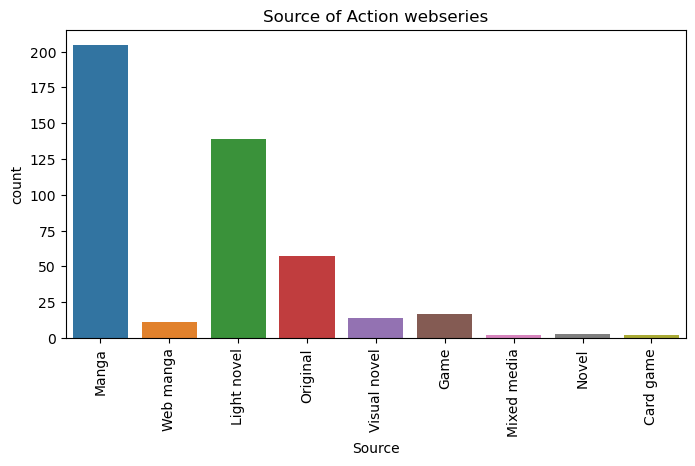

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(x='Source', data=df)
plt.title("Source of Action webseries")
plt.xticks(rotation=90)
plt.show()

## From  the above plot we can observe that more no of Action series are observed in Manga source with 205 as count

C:\Users\Admin\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


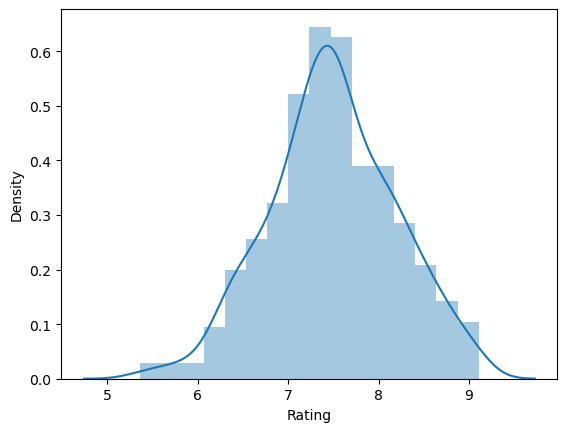

In [61]:
sns.distplot(df['Rating'],kde=True)
plt.show()

## from the above plot we can observe no of series having high rating lies between 7.36 to 7.49

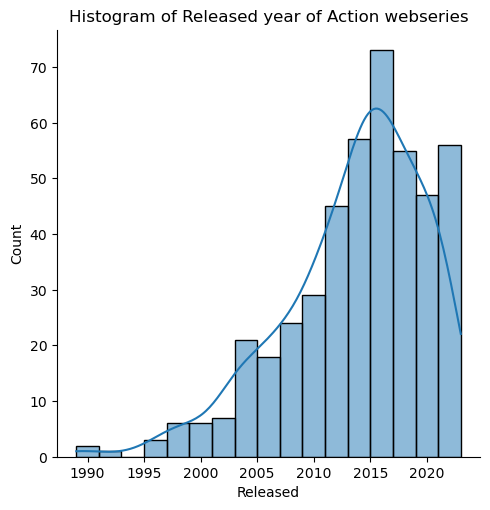

In [80]:
sns.displot(df["Released"],kde=True)
plt.title('Histogram of Released year of Action webseries')
plt.show()

### From the above plot we can identify that  in 2016 more no of action series are released i.e around 38  next even in 2014 and 2015 more series are released (36,35) and least are observed in 1995 and 1992

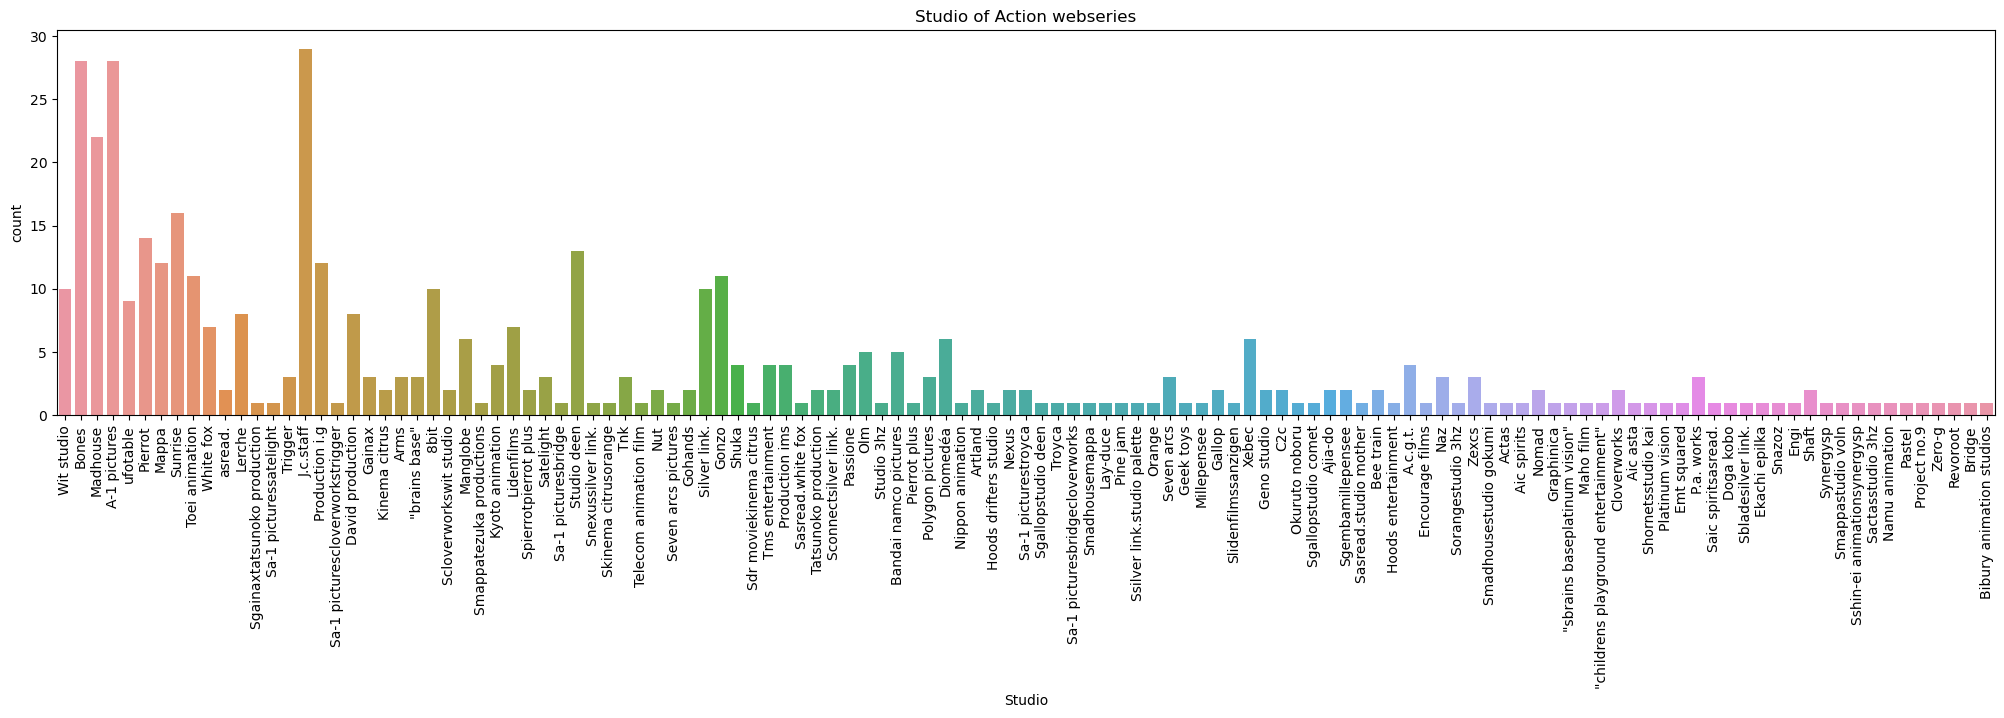

In [63]:
plt.figure(figsize=(25,5))
sns.countplot(x='Studio', data=df)
plt.title("Studio of Action webseries")
plt.xticks(rotation=90)
plt.show()

### From above plot more action series are been shooted in J.c.staff Studio like around 29 also A-1 pictures and Bones  Studios with 28 webseries

In [64]:
df["New"].value_counts()

New_webseries    308
vintage          140
Old_webseries      2
Name: New, dtype: int64

In [65]:
a =pd.DataFrame(df["New"].value_counts())
a

,New
New_webseries,308
vintage,140
Old_webseries,2


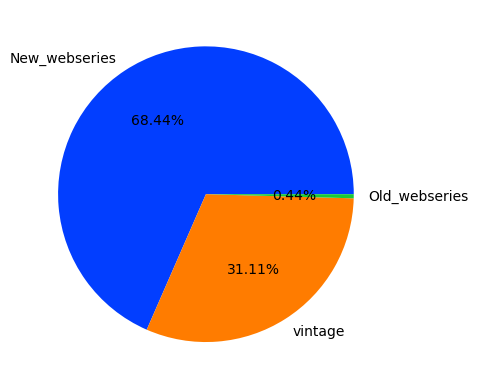

In [66]:
colors = sns.color_palette('bright')[0:3]
plt.pie(a["New"], labels = a.index,colors=colors, autopct='%.2f%%')
plt.show()

### From above pie chart we can observe that about 68.44% webseries come under new and about 31.11% come under vintage and there are relatively less  old webseries i.e 0.44%

# Bi_variate analysis:

# num-num

In [67]:
df

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3600000,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3100000,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3000000,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2900000,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2800000,7.91,2016,Manga,Bones,Shounen,New_webseries
...,...,...,...,...,...,...,...,...
453,Nurarihyon no Mago: Sennen Makyou,157000,7.95,2011,Manga,Studio deen,Shounen,vintage
455,Sengoku Basara,156000,7.34,2009,Game,Production i.g,not_given,vintage
456,Gantz 2nd Stage,156000,7.04,2004,Manga,Gonzo,Seinen,vintage
457,Fate/kaleid liner Prisma☆Illya 2wei!,155000,7.23,2014,Manga,Silver link.,not_given,New_webseries


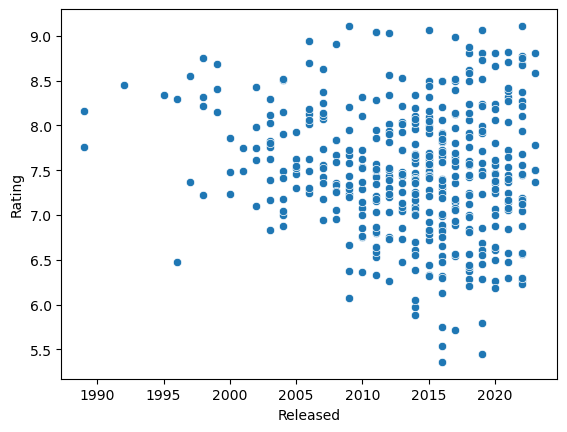

In [68]:
sns.scatterplot(x=df['Released'],y=df['Rating'],data=df)
plt.show()

### As going from 1990 to 2023 the rating gets increased gradually and mostly from 2005 people started giving ratings to most of webseries

## num-cat

In [69]:
df

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3600000,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3100000,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3000000,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2900000,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2800000,7.91,2016,Manga,Bones,Shounen,New_webseries
...,...,...,...,...,...,...,...,...
453,Nurarihyon no Mago: Sennen Makyou,157000,7.95,2011,Manga,Studio deen,Shounen,vintage
455,Sengoku Basara,156000,7.34,2009,Game,Production i.g,not_given,vintage
456,Gantz 2nd Stage,156000,7.04,2004,Manga,Gonzo,Seinen,vintage
457,Fate/kaleid liner Prisma☆Illya 2wei!,155000,7.23,2014,Manga,Silver link.,not_given,New_webseries


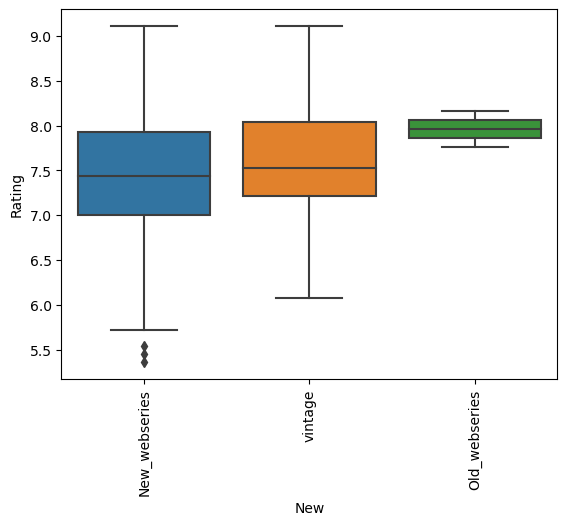

In [70]:
sns.boxplot(data=df,x='New', y='Rating')
plt.xticks(rotation=90)
plt.show()

### From above plot  only new_webseries have outliers

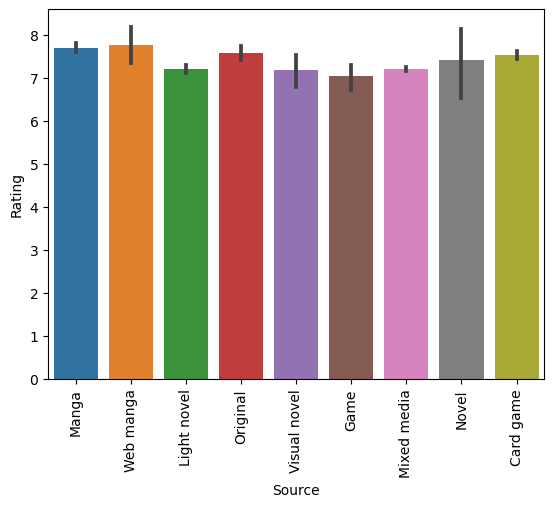

<Figure size 1500x1500 with 0 Axes>

In [71]:
sns.barplot(x=df['Source'],y=df['Rating'],data=df)
plt.xticks(rotation = 90)
plt.figure(figsize=(15, 15))
plt.show()

### By seeing the plot web manga has relatively high rating 

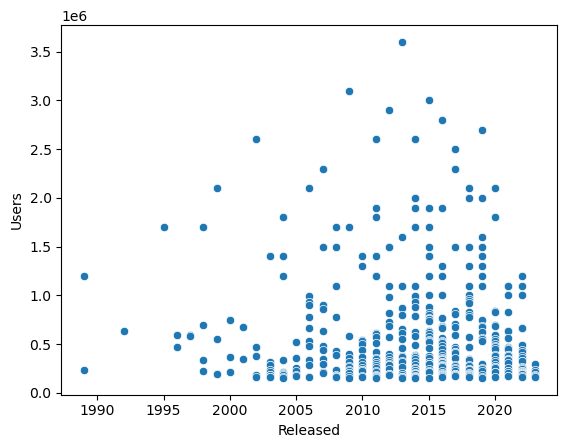

In [72]:
sns.scatterplot(x=df['Released'],y=df['Users'],data=df)
plt.show()

### From the given plot we can identify from 2005 the users in action anime gradually got increased i.e people who watch action anime users been incresed

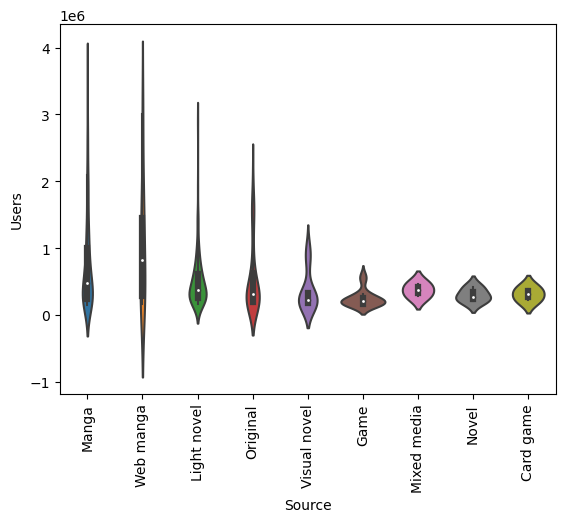

In [73]:
sns.violinplot(x=df['Source'],y=df['Users'],data=df)
plt.xticks(rotation = 90)
plt.show()

###  From the above plot we can observe Game source has more density of users

# Multivariate analysis

In [74]:
s=df.select_dtypes(include='number')
s

,Users,Rating,Released
0,3600000,8.53,2013
1,3100000,9.11,2009
2,3000000,8.50,2015
3,2900000,7.20,2012
4,2800000,7.91,2016
...,...,...,...
453,157000,7.95,2011
455,156000,7.34,2009
456,156000,7.04,2004
457,155000,7.23,2014


<AxesSubplot:>

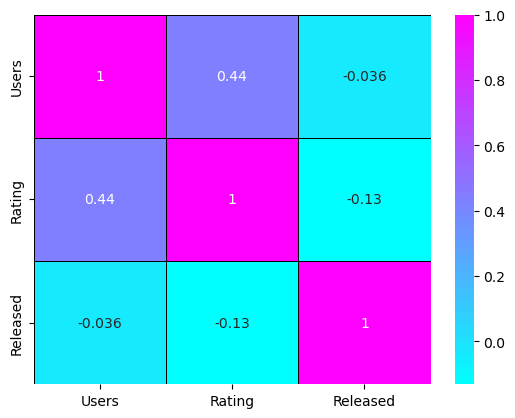

In [75]:
sns.heatmap(s.corr(),annot=True,linewidth=.5,linecolor='black',cmap='cool')

## From the given plot we can observe Users and Ratings are positively correlated but released is negetively correlated

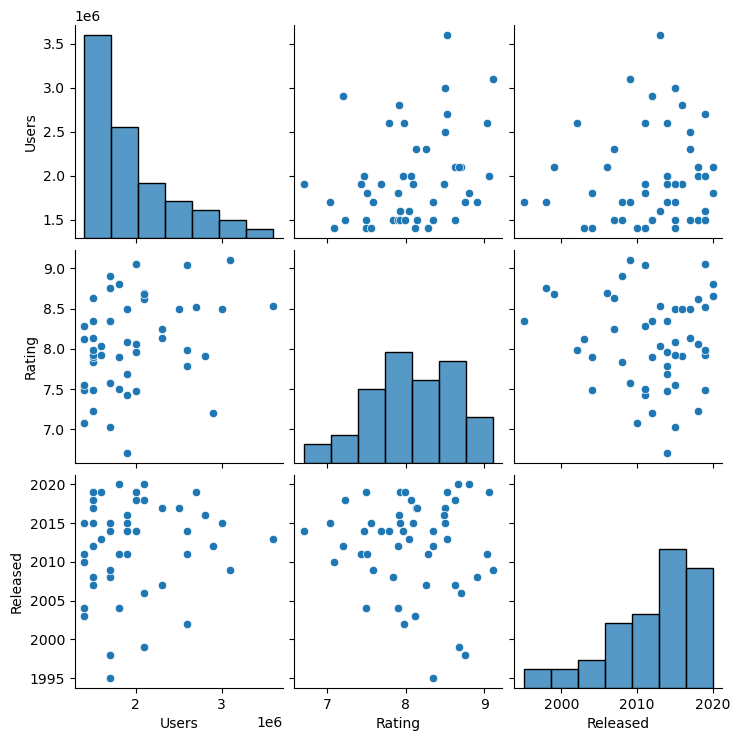

In [76]:
sns.pairplot(df.head(50))
plt.show()

## The above plot displays the relationship between multiple variables and univariate representation of each variable in a dataset.

In [77]:
df.head()

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3600000,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3100000,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3000000,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2900000,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2800000,7.91,2016,Manga,Bones,Shounen,New_webseries


In [78]:
df.sort_values(by=['Users'], ascending=False).head(30)

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3600000,8.53,2013,Manga,Wit studio,Shounen,New_webseries
1,Fullmetal Alchemist: Brotherhood,3100000,9.11,2009,Manga,Bones,Shounen,vintage
2,One Punch Man,3000000,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
3,Sword Art Online,2900000,7.20,2012,Light novel,A-1 pictures,not_given,New_webseries
4,Boku no Hero Academia,2800000,7.91,2016,Manga,Bones,Shounen,New_webseries
5,Kimetsu no Yaiba,2700000,8.52,2019,Manga,ufotable,Shounen,New_webseries
6,Naruto,2600000,7.98,2002,Manga,Pierrot,Shounen,vintage
7,Tokyo Ghoul,2600000,7.79,2014,Manga,Pierrot,Seinen,New_webseries
8,Hunter x Hunter (2011),2600000,9.04,2011,Manga,Madhouse,Shounen,vintage
9,Shingeki no Kyojin Season 2,2500000,8.50,2017,Manga,Wit studio,Shounen,New_webseries


## Analyzing top 10 anime series with users>=1800000 and rating>=8.0 and released year> 2001

In [79]:
df[(df['Users']>=1800000) & (df['Rating']>=8.0) & (df['Released']>2011)].head(10)

,Title,Users,Rating,Released,Source,Studio,Demographic,New
0,Shingeki no Kyojin,3600000,8.53,2013,Manga,Wit studio,Shounen,New_webseries
2,One Punch Man,3000000,8.50,2015,Web manga,Madhouse,Seinen,New_webseries
5,Kimetsu no Yaiba,2700000,8.52,2019,Manga,ufotable,Shounen,New_webseries
9,Shingeki no Kyojin Season 2,2500000,8.50,2017,Manga,Wit studio,Shounen,New_webseries
10,Boku no Hero Academia 2nd Season,2300000,8.13,2017,Manga,Bones,Shounen,New_webseries
12,Jujutsu Kaisen,2100000,8.66,2020,Manga,Mappa,Shounen,New_webseries
13,Shingeki no Kyojin Season 3,2100000,8.62,2018,Manga,Wit studio,Shounen,New_webseries
17,Boku no Hero Academia 3rd Season,2000000,8.06,2018,Manga,Bones,Shounen,New_webseries
18,Shingeki no Kyojin Season 3 Part 2,2000000,9.06,2019,Manga,Wit studio,Shounen,New_webseries
22,Mob Psycho 100,1900000,8.49,2016,Web manga,Bones,not_given,New_webseries
